In [279]:
import os.path 
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from statistics import pstdev
from scipy.fft import fftshift, ifft, fftfreq
import numpy as np
from scipy.signal.windows import tukey
import math
from scipy.interpolate import interp1d
from time import time as time
from time import strftime
from datetime import date
from scipy.signal import ShortTimeFFT
from scipy.signal import find_peaks, peak_widths
from scipy.stats import norm
from IPython.display import display, Latex
import re 
from scipy import optimize
from scipy.optimize import curve_fit
from scipy.signal import hilbert
from matplotlib.patches import Rectangle

import lmfit

from scipy.signal.windows import tukey

plt.rcParams.update({'font.size':10})

20


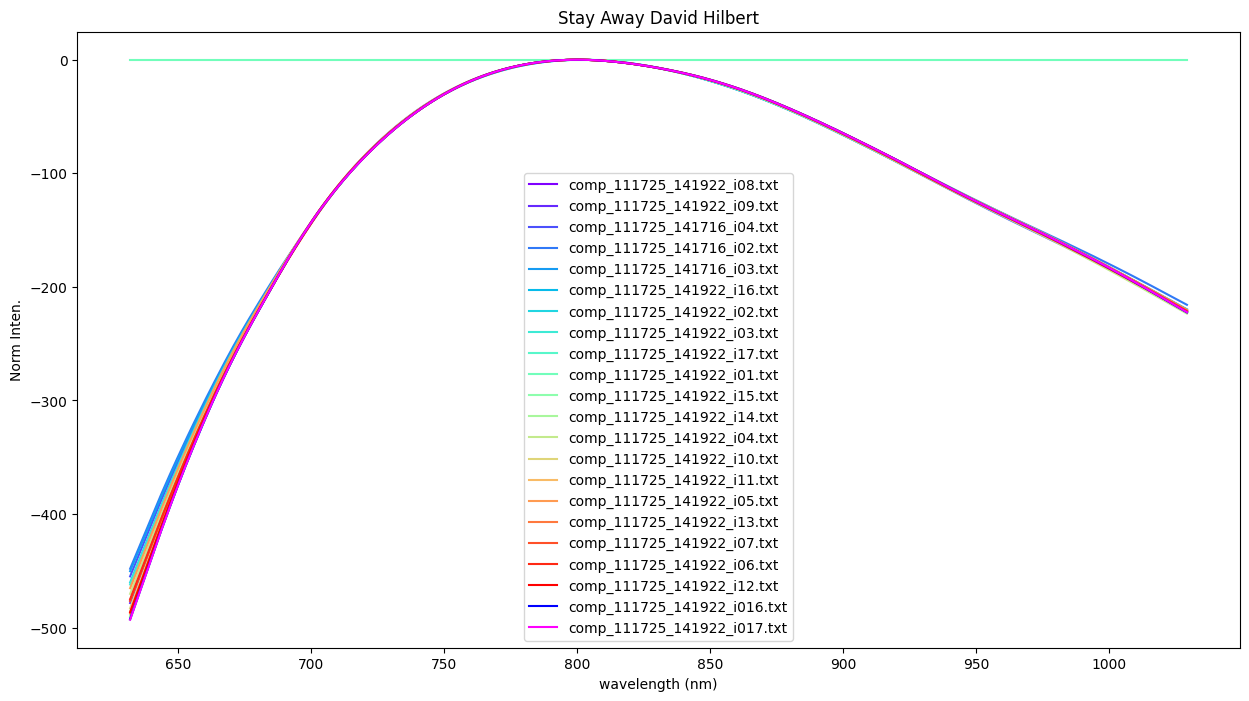

In [280]:
folder_path= r'/Users/craigpaterson/Library/CloudStorage/OneDrive-UniversityofGlasgow/5th Year/Project Data/Compensation Masks 201125/'
file_16 = r'/Users/craigpaterson/Library/CloudStorage/OneDrive-UniversityofGlasgow/5th Year/Project Data/Compensation Masks 201125/comp_111725_141922_i16.txt'
file_16_loaded = np.loadtxt(file_16)
waves_16 = file_16_loaded[:,0]
amp_16 = file_16_loaded[:,1]
file_17 = r'/Users/craigpaterson/Library/CloudStorage/OneDrive-UniversityofGlasgow/5th Year/Project Data/Compensation Masks 201125/comp_111725_141922_i17.txt'
file_17_loaded = np.loadtxt(file_17)
waves_17 = file_17_loaded[:,0]
amp_17 = file_17_loaded[:,1]
plt.figure(figsize=(15,8))
print(len(os.listdir(folder_path)))
color = iter(plt.cm.rainbow(np.linspace(0, 1, len(os.listdir(folder_path)))))
cmap = plt.get_cmap('rainbow', len(os.listdir(folder_path)))
for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        #print('I am computing file',file)
        loaded_data = np.loadtxt(file_path)
        waves = loaded_data[:,0]
        amp = loaded_data[:,1]

        c = next(color)
        plt.plot(waves, amp, color =c, label =file)
plt.plot(waves_16, amp_16, color ='blue', label ='comp_111725_141922_i016.txt')
plt.plot(waves_17, amp_17, color ='magenta', label ='comp_111725_141922_i017.txt')        
plt.xlabel("wavelength (nm)")
plt.ylabel("Norm Inten.")
plt.title("Stay Away David Hilbert")
plt.legend()
#plt.xlim(-200,400)


plt.show()


In [281]:
print(len(waves_17))

print(waves_17)

640
[ 632.0153  632.6662  633.317   633.9677  634.6183  635.2688  635.9192
  636.5695  637.2197  637.8699  638.5199  639.1699  639.8197  640.4695
  641.1192  641.7688  642.4183  643.0677  643.717   644.3662  645.0153
  645.6644  646.3133  646.9622  647.611   648.2596  648.9082  649.5567
  650.2051  650.8534  651.5017  652.1498  652.7978  653.4458  654.0936
  654.7414  655.3891  656.0366  656.6841  657.3315  657.9788  658.626
  659.2732  659.9202  660.5671  661.214   661.8607  662.5074  663.154
  663.8005  664.4469  665.0932  665.7394  666.3855  667.0315  667.6775
  668.3233  668.9691  669.6147  670.2603  670.9058  671.5512  672.1965
  672.8417  673.4868  674.1318  674.7767  675.4216  676.0663  676.711
  677.3555  678.      678.6444  679.2887  679.9329  680.577   681.221
  681.865   682.5088  683.1525  683.7962  684.4398  685.0832  685.7266
  686.3699  687.0131  687.6562  688.2992  688.9421  689.585   690.2277
  690.8703  691.5129  692.1554  692.7977  693.44    694.0822  694.7243
  695.

In [282]:

Omega = np.linspace(632.0153,1029.304,640)



a2 = 0.1 # s^2, adjust to see broadening
phase_data = -(a2 * (waves_17)**2)  

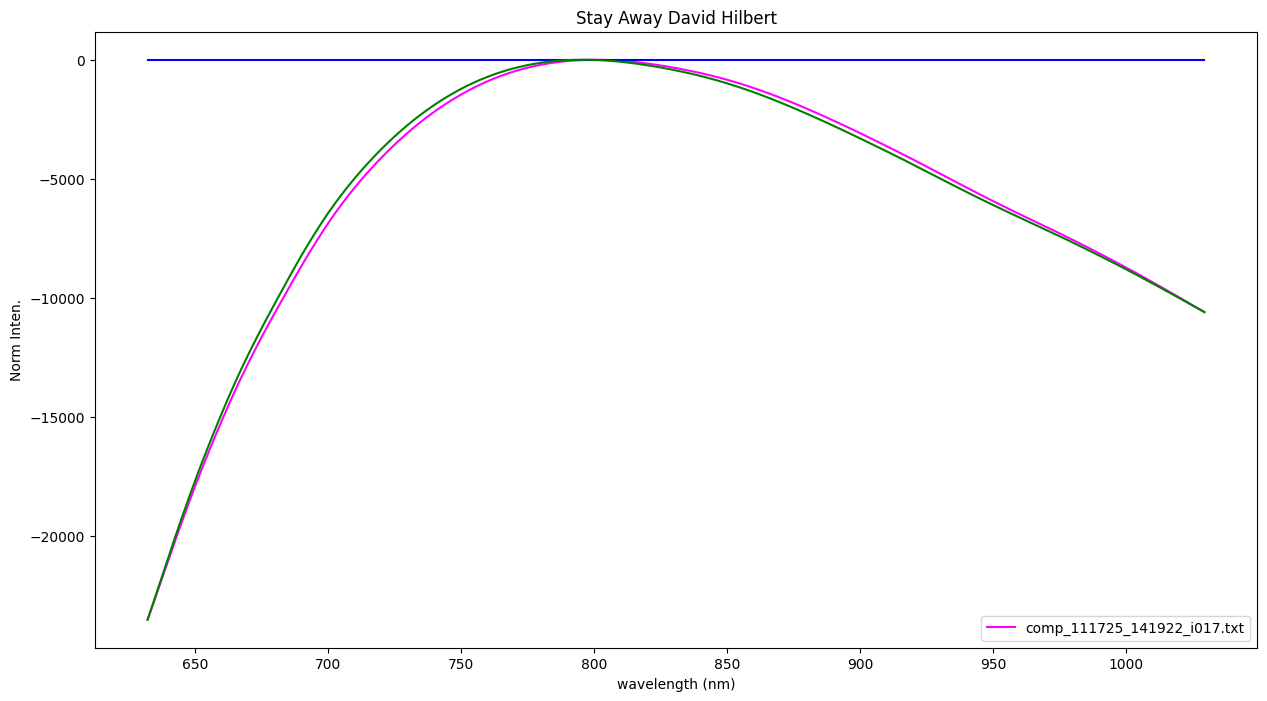

In [283]:

norm_comp = amp_17/np.max(amp_17)
norm_phase = phase_data/np.max(phase_data)
summation = norm_comp + norm_phase

plt.figure(figsize=(15,8))
plt.plot(waves_17, norm_comp, color ='magenta', label ='comp_111725_141922_i017.txt') 
plt.plot(Omega,norm_phase, color ='blue')      
plt.plot (Omega,summation, color='green')
plt.xlabel("wavelength (nm)")
plt.ylabel("Norm Inten.")
plt.title("Stay Away David Hilbert")
plt.legend()
#plt.xlim(-200,400)


plt.show()

In [284]:
phase_file = r'/Users/craigpaterson/Library/CloudStorage/OneDrive-UniversityofGlasgow/5th Year/Project Data/201125 Attempt/201125_phase_mask_pred_25fs_Pmasks.txt'
phase_data_load = np.loadtxt(phase_file,skiprows =9 )

phase_wave = phase_data_load[:,0]
phase_amp= phase_data_load[:,1]
phase_file_big = r'/Users/craigpaterson/Library/CloudStorage/OneDrive-UniversityofGlasgow/5th Year/Project Data/201125 Attempt/201125_phase_mask_pred_25fs_hope_Pmasks.txt'
phase_data_load_big = np.loadtxt(phase_file_big,skiprows =9 )

phase_wave_big = phase_data_load_big[:,0]
phase_amp_big= phase_data_load_big[:,1]

comp_file = r'/Users/craigpaterson/Library/CloudStorage/OneDrive-UniversityofGlasgow/5th Year/Project Data/201125 Attempt/comp_112025_150348_i17.txt'
comp_data_load = np.loadtxt(comp_file)
comp_wave = comp_data_load[:,0]
comp_amp = comp_data_load[:,1]



[ 1.31984065e-03 -2.18807683e+00  9.07429598e+02]


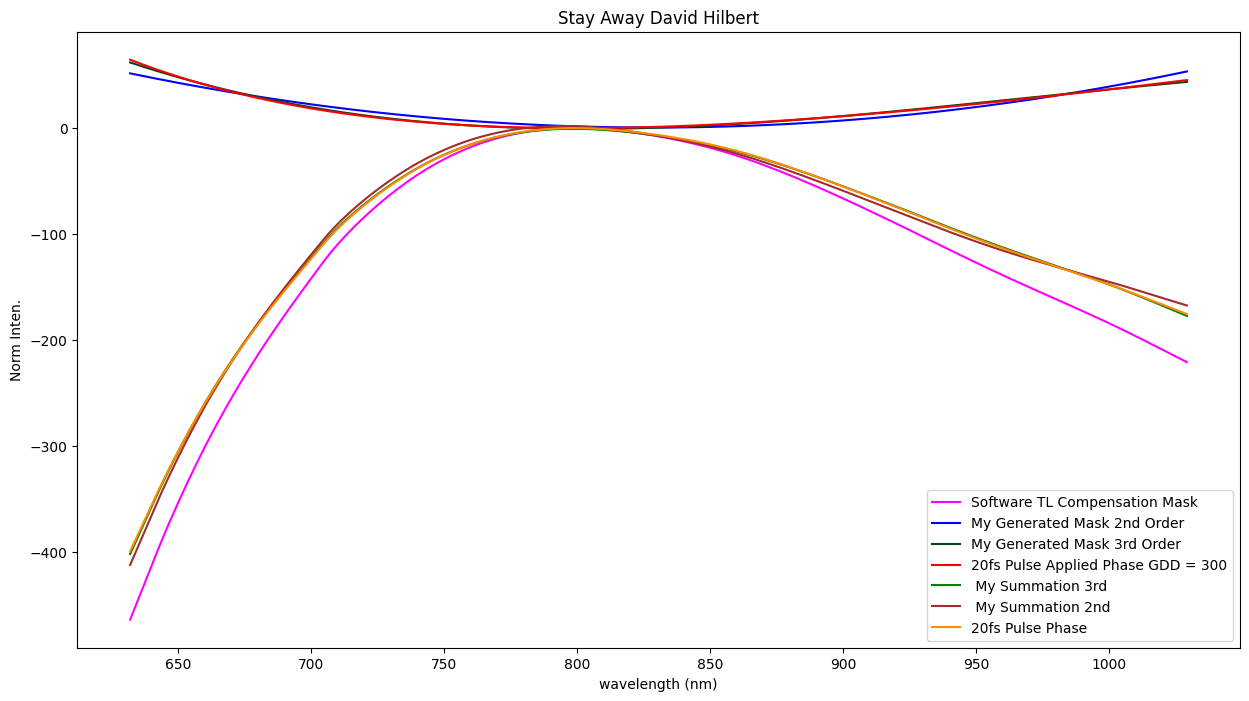

[ 1.31984065e-03 -2.18807683e+00  9.07429598e+02]


In [285]:

a2 = 1/7000# s^2, adjust to see broadening
a1 = 0.001
a0 = 0
phase_data = a2* (phase_wave)**2 + a1* (phase_wave) + a0

big_sum = comp_amp + phase_amp_big

def quad(x,a,b,c):

    return a*x**2 + b*x +c 

fit = np.polyfit(phase_wave_big,phase_amp_big,2)
fit_3 = np.polyfit(phase_wave,phase_amp_big,3)
params6,params_covariance6 = curve_fit(quad, phase_wave_big,phase_amp_big, p0=[1,1,1],maxfev =3000)

a2 = params6[0]# s^2, adjust to see broadening
a1 = params6[1]
a0 = params6[2]
phase_data = a2* (phase_wave)**2 + a1* (phase_wave) + a0

phase_data_2 = fit[0]*phase_wave**2 + fit[1]*phase_wave + fit[2] 
phase_data = fit_3[0]*phase_wave**3 + fit_3[1]*phase_wave**2 + fit_3[2]*phase_wave +fit_3[3]
summed_3rd = comp_amp + phase_data
summed_2nd = comp_amp + phase_data_2

plt.figure(figsize=(15,8))
#plt.plot(Omega,norm_phase, color ='blue', label ='My Mask')  
plt.plot(comp_wave, comp_amp, color ='magenta', label ='Software TL Compensation Mask') 
plt.plot(phase_wave,phase_data_2, color ='blue', label ='My Generated Mask 2nd Order') 
plt.plot(phase_wave,phase_data, color ='#04471c', label ='My Generated Mask 3rd Order')   
plt.plot(phase_wave_big,phase_amp_big, color ='red', label ='20fs Pulse Applied Phase GDD = 300')    
plt.plot(comp_wave, summed_3rd , color ='green', label =' My Summation 3rd') 
plt.plot(comp_wave, summed_2nd , color ='brown', label =' My Summation 2nd')   
plt.plot(comp_wave, big_sum , color ='darkorange', label ='20fs Pulse Phase')  
#plt.plot (Omega,summation, color='green')
plt.xlabel("wavelength (nm)")
plt.ylabel("Norm Inten.")
plt.title("Stay Away David Hilbert")
plt.legend()
#plt.xlim(-200,400)
print(fit)

plt.show()
print(fit)

In [286]:
file_name = '25fs_TL_summed_mask.txt'
file_name_2 = '25fs_big_TL_summed_mask.txt'

np.savetxt(file_name, np.c_[comp_wave, summed],delimiter='\t')
np.savetxt(file_name_2, np.c_[comp_wave, big_sum],delimiter='\t')


[ 1.31984065e-03 -2.18807683e+00  9.07429598e+02]


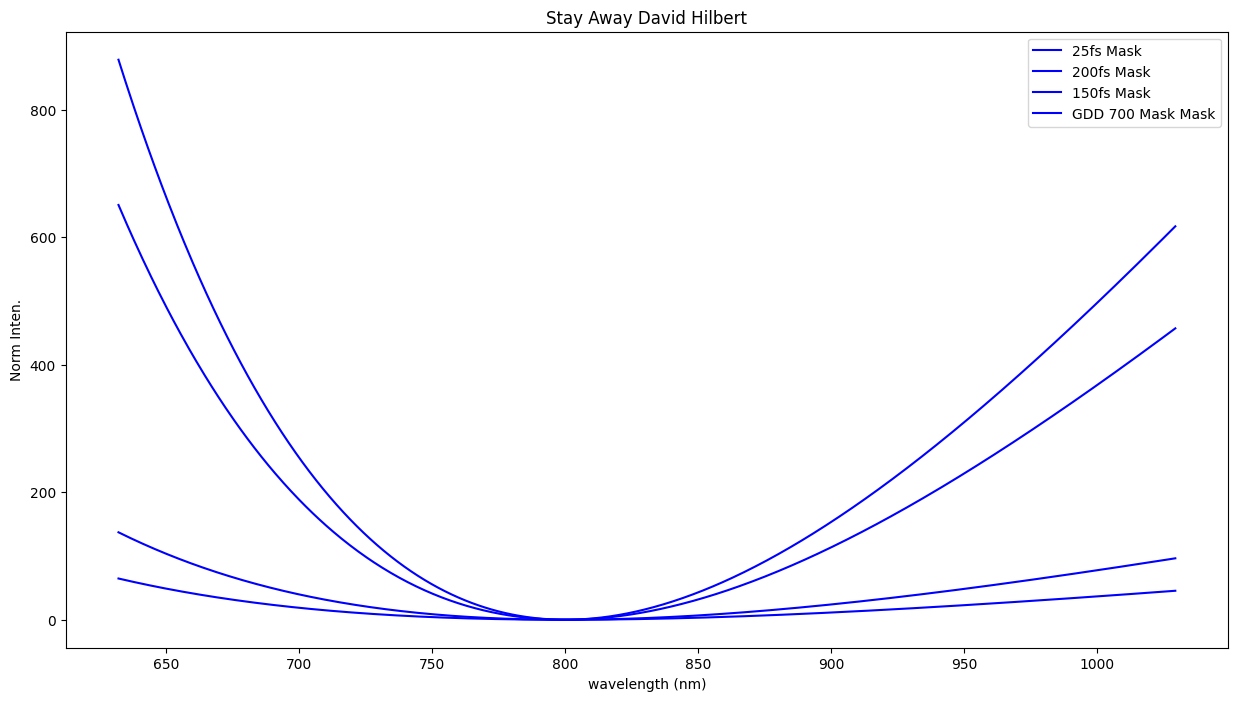

In [329]:
phase_file_25 = r'/Users/craigpaterson/Library/CloudStorage/OneDrive-UniversityofGlasgow/5th Year/Project Data/211125/211125_phase_mask_pred_25fs_Pmasks.txt'
phase_data_25 = np.loadtxt(phase_file_25,skiprows =9 )

phase_wave_25 = phase_data_25[:,0]
phase_amp_25= phase_data_25[:,1]

phase_file_150 = r'/Users/craigpaterson/Library/CloudStorage/OneDrive-UniversityofGlasgow/5th Year/Project Data/211125/211125_phase_mask_pred_150fs_Pmasks.txt'
phase_data_150 = np.loadtxt(phase_file_150,skiprows =9 )

phase_wave_150 = phase_data_150[:,0]
phase_amp_150= phase_data_150[:,1]

phase_file_200 = r'/Users/craigpaterson/Library/CloudStorage/OneDrive-UniversityofGlasgow/5th Year/Project Data/211125/211125_phase_mask_pred_200fs_Pmasks.txt'
phase_data_200 = np.loadtxt(phase_file_200,skiprows =9 )

phase_wave_200 = phase_data_200[:,0]
phase_amp_200= phase_data_200[:,1]


phase_file_700 = r'/Users/craigpaterson/Library/CloudStorage/OneDrive-UniversityofGlasgow/5th Year/Project Data/211125/251125_phase_mask_GDD_700_Pmasks.txt'
phase_data_700 = np.loadtxt(phase_file_700,skiprows =9 )

phase_wave_700 = phase_data_700[:,0]
phase_amp_700= phase_data_700[:,1]


plt.figure(figsize=(15,8))
#plt.plot(Omega,norm_phase, color ='blue', label ='My Mask')  
#plt.plot(comp_wave, comp_amp, color ='magenta', label ='Software TL Compensation Mask') 
plt.plot(phase_wave_25,phase_amp_25, color ='blue', label ='25fs Mask') 
plt.plot(phase_wave_200,phase_amp_200, color ='blue', label ='200fs Mask') 
plt.plot(phase_wave_150,phase_amp_150, color ='blue', label ='150fs Mask') 
plt.plot(phase_wave_700,phase_amp_700, color ='blue', label ='GDD 700 Mask Mask') 
plt.xlabel("wavelength (nm)")
plt.ylabel("Norm Inten.")
plt.title("Stay Away David Hilbert")
plt.legend()
#plt.xlim(-200,400)
print(fit)

plt.show()



In [331]:
summed_25 = comp_amp + phase_amp_25
summed_150 = comp_amp + phase_amp_150
summed_200 = comp_amp + phase_amp_200
summed_700  = comp_amp + phase_amp_700

[ 1.31984065e-03 -2.18807683e+00  9.07429598e+02]


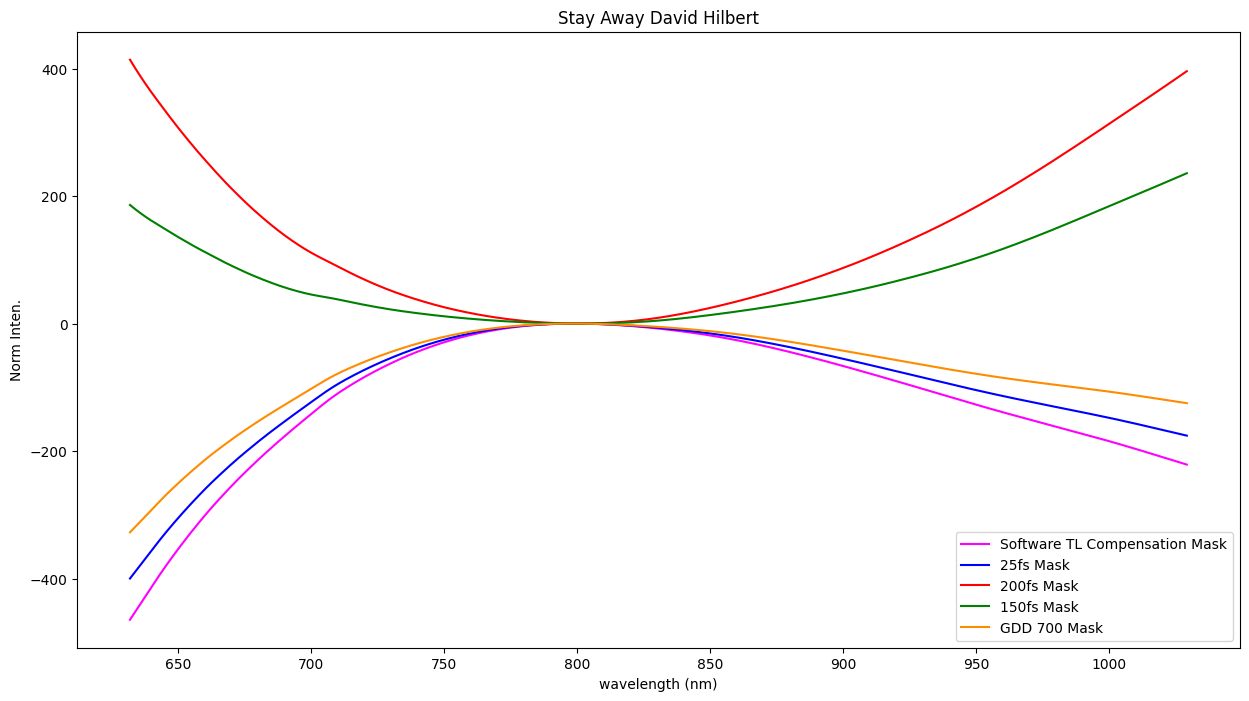

In [332]:
plt.figure(figsize=(15,8))
#plt.plot(Omega,norm_phase, color ='blue', label ='My Mask')  
plt.plot(comp_wave, comp_amp, color ='magenta', label ='Software TL Compensation Mask') 
plt.plot(phase_wave_25,summed_25, color ='blue', label ='25fs Mask') 
plt.plot(phase_wave_200,summed_200, color ='red', label ='200fs Mask') 
plt.plot(phase_wave_150,summed_150, color ='green', label ='150fs Mask')
plt.plot(phase_wave_700,summed_700, color ='darkorange', label ='GDD 700 Mask')  
plt.xlabel("wavelength (nm)")
plt.ylabel("Norm Inten.")
plt.title("Stay Away David Hilbert")
plt.legend()
#plt.xlim(-200,400)
print(fit)

plt.show()

In [333]:
file_name_25 = '25fs_TL_summed_mask_2.txt'
file_name_150 = '150fs_TL_summed_mask.txt'
file_name_200 = '200fs_TL_summed_mask.txt'
file_name_700 = '700_GDD_TL_summed_mask.txt'

#np.savetxt(file_name_25, np.c_[comp_wave, summed_25],delimiter='\t')
#np.savetxt(file_name_200, np.c_[comp_wave, summed_200],delimiter='\t')
#np.savetxt(file_name_150, np.c_[comp_wave, summed_150],delimiter='\t')
np.savetxt(file_name_700, np.c_[comp_wave, summed_700],delimiter='\t')